In [3]:
"""
linear regression with tensorflow
"""
# load packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 

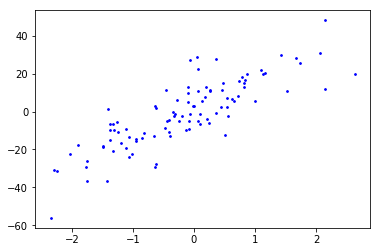

In [10]:
# 使用sklearn api生成随机回归数据
from sklearn.datasets import make_regression
# n_samples 样本数据  n_features 特征数量  noise 噪声  coef 是否返回回归系数
train_X, train_Y ,coef = make_regression(n_samples=100, n_features=1, noise=10,coef=True)
# 绘制散点图
plt.scatter(train_X, train_Y, c = 'b', s = 3)
plt.show()

In [24]:
# 创建线性回归模型
# params
training_epochs = 1000

# create tensorflow graph
X = tf.placeholder(tf.float32, name='input')
Y = tf.placeholder(tf.float32, name='output')
W = tf.Variable(np.random.randn, name='weight')
b = tf.Variable(np.random.randn, name='bias')

# create model
y_hat = tf.add(tf.multiply(X, W), b)

# learning rate
learning_rate = 0.01

# cost function
cost = tf.reduce_mean(tf.pow(y_hat - Y, 2))

# 优化器 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 初始化
init = tf.global_variables_initializer()

In [28]:
# start training
sess = tf.Session()
# 每训练50次 输出当前训练的W b
display_steps = 50
# init
sess.run(init)
for epoch in range(training_epochs):
    for x, y in zip(train_X, train_Y):
        # print("x : {0}, y : {1}".format(x[0], y))
        sess.run(optimizer, feed_dict={X:x, Y:y})
    if epoch % display_steps == 0:
        Wtemp = sess.run(W)
        btemp = sess.run(b)
        print (" Wtemp is", "{:.4f}".format(Wtemp), "btemp is", "{:.4f}".format(btemp))

 Wtemp is 12.0948 btemp is 1.0314
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301
 Wtemp is 13.5393 btemp is 2.0301


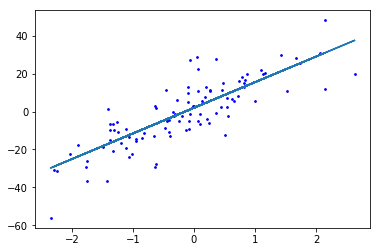

In [46]:
# 最终训练结果
# Final W and b
W_res = sess.run(W)
b_res = sess.run(b)
Y_res = train_X * W_res + b_res
# 画图显示训练结果
plt.scatter(train_X, train_Y, c = 'b', s = 3)
plt.plot(train_X, Y_res)
plt.show()